# Content and Objective

- Illustrating effect of several impulse responses (sampled w. symbol rate) onto symbol error rate
- Show according symbol error rates

In [22]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline


In [23]:

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(14, 7) )

# Channels with Inter-Symbol-Interference

- Show some channel models out of Proakis: Digital Communications, MacGraw Hill, 2008
- Channels out of [Proakis]
- Called (a), (b), and (c) channel respectively

In [24]:
# impulse responses
h_a = np.array( [ .04, -.05, .07, -.21, -.5, .72, .36, 0, .21, .03, .07 ] )
h_b = np.array( [ .407, .815, .407 ] )
h_c = np.array( [ .227, .46, .688, .46, .227 ] )

In [25]:
# determine according frequency responses
N_fft = 512

H_a = np.fft.fft( np.hstack( ( h_a, np.zeros( N_fft - len(h_a) ) ) ) )
H_b = np.fft.fft( np.hstack( ( h_b, np.zeros( N_fft - len(h_b) ) ) ) )
H_c = np.fft.fft( np.hstack( ( h_c, np.zeros( N_fft - len(h_c) ) ) ) )

Omega = np.linspace( -np.pi, np.pi, N_fft )

Text(0.5, 0, '$\\Omega$')

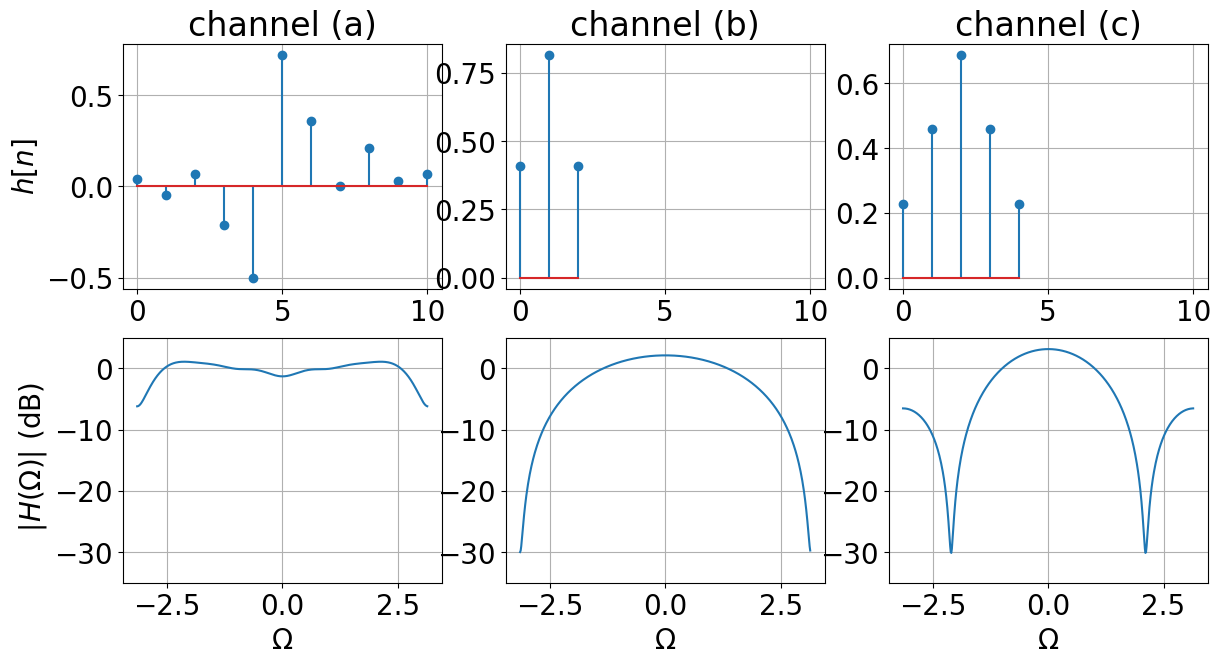

In [26]:
plt.figure()

plt.subplot(231)
plt.stem( h_a )
plt.title('channel (a)')
plt.ylabel('$h[n]$')
plt.xlabel('$n$')
plt.xlim( ( -.5, 10.5) )
plt.grid(1)

plt.subplot(232)
plt.stem( h_b )
plt.title('channel (b)')
plt.xlabel('$n$')
plt.xlim( ( -.5, 10.5) )
plt.grid(1)

plt.subplot(233)
plt.stem( h_c )
plt.title( 'channel (c)')
plt.xlabel('$n$')
plt.xlim( ( -.5, 10.5) )
plt.grid(1)

plt.subplot(234)
plt.plot( Omega, 10*np.log10( np.abs( np.fft.fftshift( H_a ) ) ) )
plt.ylabel( ' $|H(\\Omega)|$ (dB)' )
plt.ylim( (-35, 5))
plt.grid(1)
plt.xlabel('$\Omega$')

plt.subplot(235)
plt.plot( Omega, 10*np.log10( np.abs( np.fft.fftshift( H_b ) ) ) )
plt.ylim( (-35, 5))
plt.grid(1)
plt.xlabel('$\Omega$')

plt.subplot(236)
plt.plot( Omega, 10*np.log10( np.abs( np.fft.fftshift( H_c ) ) ))
plt.ylim( (-35, 5))
plt.grid(1)
plt.xlabel('$\Omega$')


### Filter symbol sequence with the according impulse response

- First choose channel to be used

In [6]:
# select channel
h = h_a

# length of impulse response
N_h = len( h )

In [7]:
# define length of symbol sequence
N_symb = 20

# generate BSPK sequence and filter
a = 1 - 2 * np.random.randint( 2, size=N_symb )

# filter with symbol-sampled impulse response
r = np.convolve( a, h )

# sliced regions, removing filter effects at the border
n_sliced = np.arange( N_h // 2, len( r ) - N_h // 2 ) 
r_sliced = r[ N_h // 2 : - N_h // 2 + 1 ]

**Exercise:** Reason the slicing applied in the last line of the previous cell.

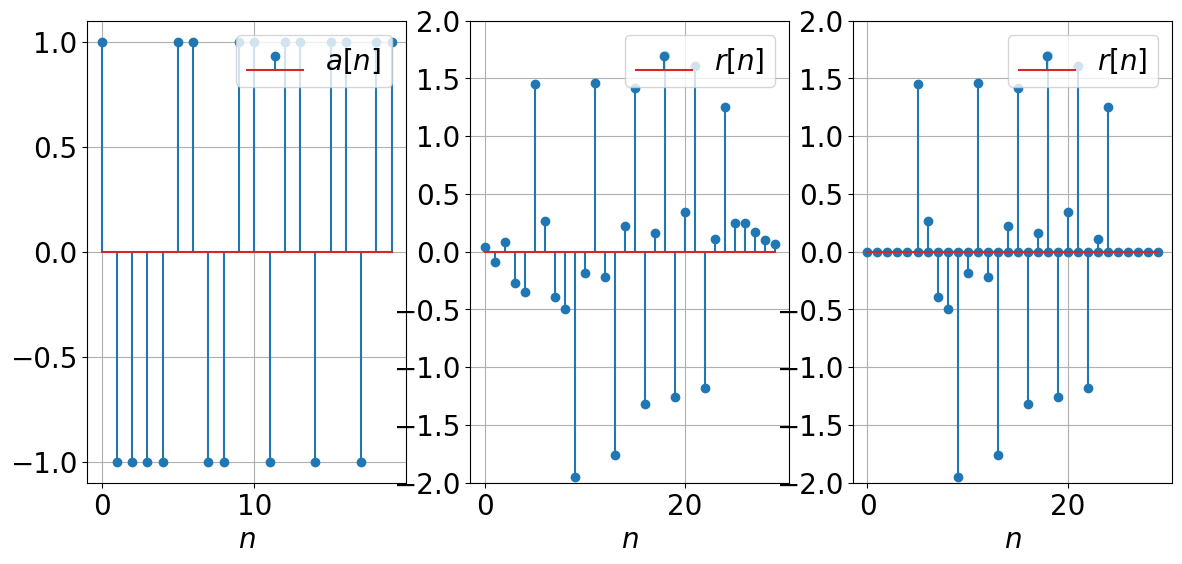

In [8]:
matplotlib.rc('figure', figsize=(14, 6) )

plt.figure()

plt.subplot(131)
plt.stem( a, label='$a[n]$' )
plt.grid(1)
plt.xlabel('$n$')
plt.legend(loc=1)

plt.subplot(132)
plt.stem( np.arange( 0, len(r) ), r, label='$r[n]$' )
plt.ylim( ( -2, 2) ) 
plt.grid(1)
plt.xlabel('$n$')
plt.legend(loc=1)

plt.subplot(133)
plt.stem( np.arange( 0, len(r) ), np.zeros_like(r) )
plt.stem( n_sliced, r_sliced, label='$r[n]$' )
plt.ylim( ( -2, 2 ) ) 
plt.grid(1)
plt.xlabel('$n$')
plt.legend(loc=1)